**Importaciones**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

**Carga de datos**

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Selección de características y variable objetivo**

In [3]:
# Convertir la variable objetivo en una variable binaria
threshold = df['AveragePrice'].median()  # Usar la mediana como umbral
df['PriceCategory'] = (df['AveragePrice'] > threshold).astype(int)  # 1 si el precio es alto, 0 si es bajo
# Seleccionar las características y la nueva variable objetivo
X = df[['Total Volume', '4046', '4225', '4770']]  # Características
y = df['PriceCategory']  # Nueva variable objetivo binaria

In [4]:
print(f'Forma de X antes de la división: {X.shape}')
print(f'Forma de y antes de la división: {y.shape}')

Forma de X antes de la división: (18249, 4)
Forma de y antes de la división: (18249,)


**Visualización de una muestra**

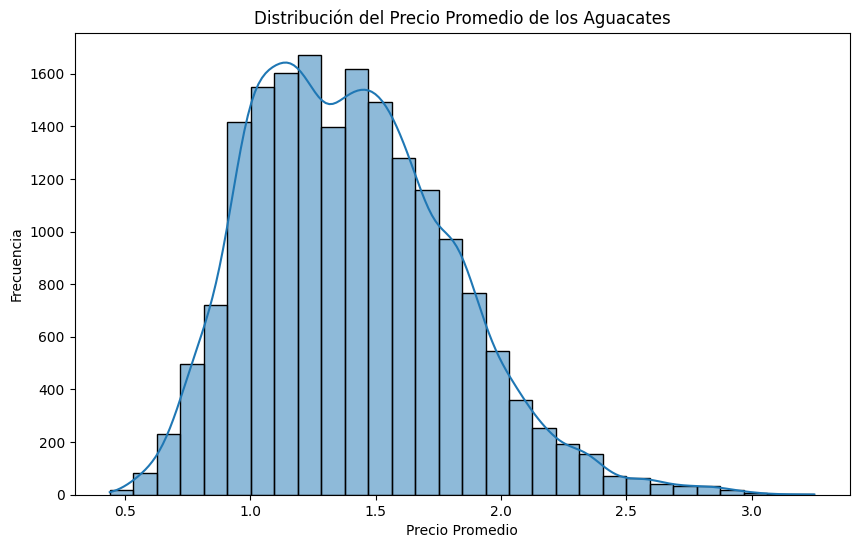

In [5]:
# Histograma del precio promedio
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribución del Precio Promedio de los Aguacates')
plt.xlabel('Precio Promedio')
plt.ylabel('Frecuencia')
plt.show()

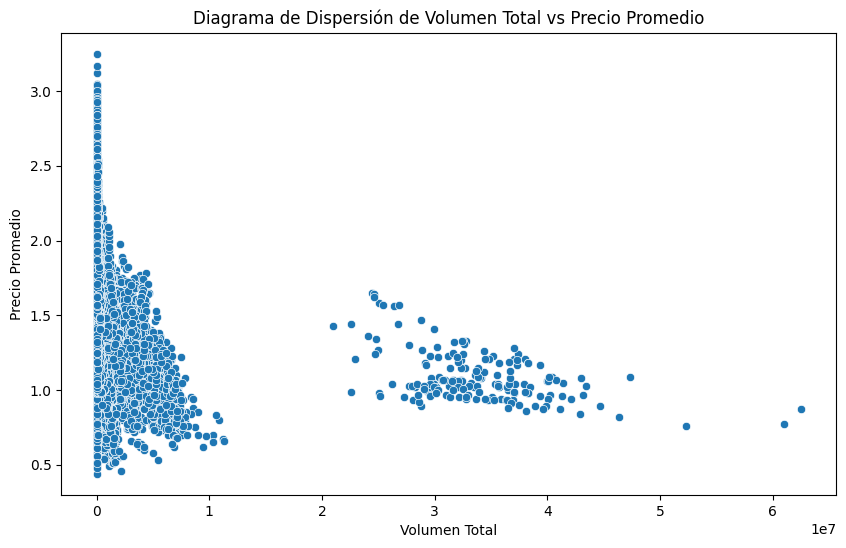

In [6]:
# Diagrama de dispersión de 'Total Volume' vs 'AveragePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=df)
plt.title('Diagrama de Dispersión de Volumen Total vs Precio Promedio')
plt.xlabel('Volumen Total')
plt.ylabel('Precio Promedio')
plt.show()

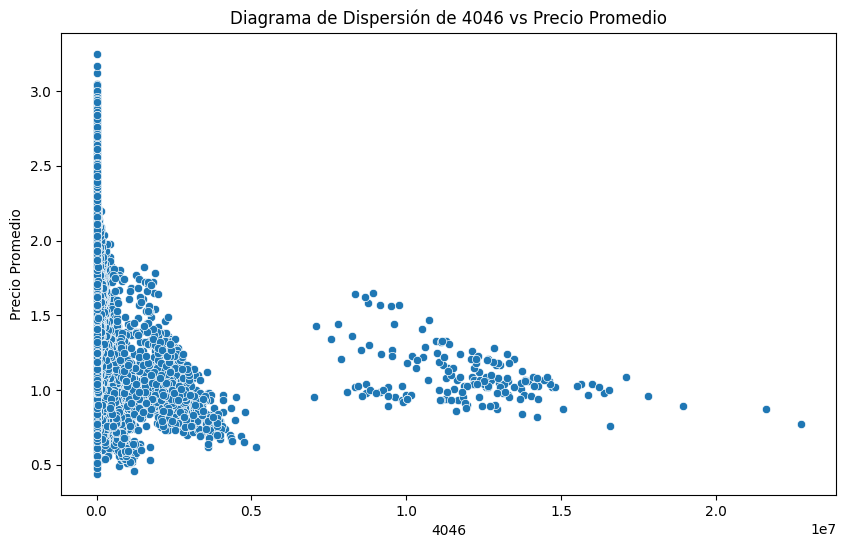

In [7]:
# Diagrama de dispersión de '4046' vs 'AveragePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='4046', y='AveragePrice', data=df)
plt.title('Diagrama de Dispersión de 4046 vs Precio Promedio')
plt.xlabel('4046')
plt.ylabel('Precio Promedio')
plt.show()

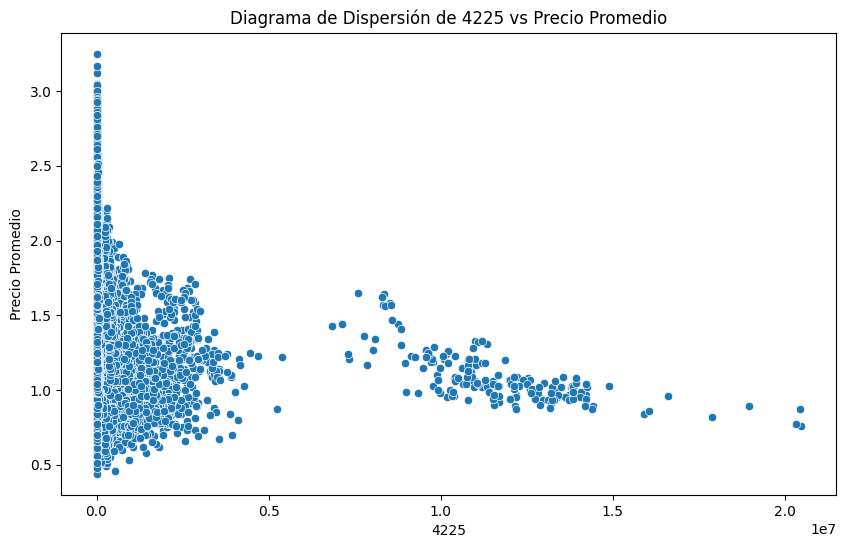

In [8]:
# Diagrama de dispersión de '4225' vs 'AveragePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='4225', y='AveragePrice', data=df)
plt.title('Diagrama de Dispersión de 4225 vs Precio Promedio')
plt.xlabel('4225')
plt.ylabel('Precio Promedio')
plt.show()

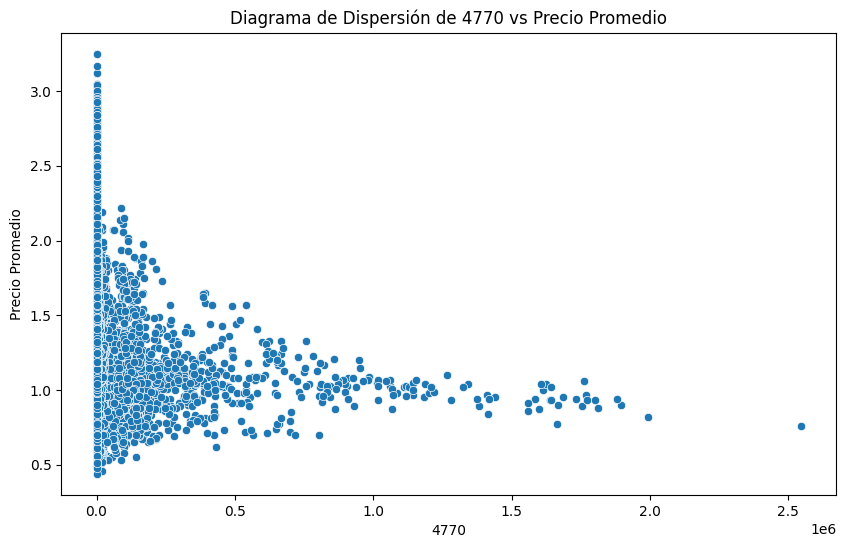

In [9]:
# Diagrama de dispersión de '4770' vs 'AveragePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='4770', y='AveragePrice', data=df)
plt.title('Diagrama de Dispersión de 4770 vs Precio Promedio')
plt.xlabel('4770')
plt.ylabel('Precio Promedio')
plt.show()

**Conjunto de entrenamiento y prueba**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f'Forma de X_train después de la división: {X_train.shape}')
print(f'Forma de y_train después de la división: {y_train.shape}')

Forma de X_train después de la división: (14599, 4)
Forma de y_train después de la división: (14599,)


**Normalización de los datos**

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print(f'Forma de X_train después de la normalización: {X_train.shape}')
print(f'Forma de X_test después de la normalización: {X_test.shape}')
print(f'Forma de y_train después de la normalización: {y_train.shape}')
print(f'Forma de y_test después de la normalización: {y_test.shape}')

Forma de X_train después de la normalización: (14599, 4)
Forma de X_test después de la normalización: (3650, 4)
Forma de y_train después de la normalización: (14599,)
Forma de y_test después de la normalización: (3650,)


**Construcción del modelo**

In [16]:
model = Sequential()

# Añadir las capas
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

**Compilación del modelo**

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Entrenamiento del modelo**

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
365/365 [==============================] - 6s 11ms/step - loss: 0.5880 - accuracy: 0.7053 - val_loss: 0.5610 - val_accuracy: 0.7267
Epoch 2/50
365/365 [==============================] - 3s 7ms/step - loss: 0.5339 - accuracy: 0.7455 - val_loss: 0.5446 - val_accuracy: 0.7363
Epoch 3/50
365/365 [==============================] - 2s 5ms/step - loss: 0.5155 - accuracy: 0.7599 - val_loss: 0.5273 - val_accuracy: 0.7579
Epoch 4/50
365/365 [==============================] - 2s 5ms/step - loss: 0.5061 - accuracy: 0.7660 - val_loss: 0.5229 - val_accuracy: 0.7671
Epoch 5/50
365/365 [==============================] - 1s 4ms/step - loss: 0.5007 - accuracy: 0.7715 - val_loss: 0.5212 - val_accuracy: 0.7678
Epoch 6/50
365/365 [==============================] - 1s 3ms/step - loss: 0.4986 - accuracy: 0.7736 - val_loss: 0.5243 - val_accuracy: 0.7527
Epoch 7/50
365/365 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.7731 - val_loss: 0.5133 - val_accuracy: 0.7685
Epoch

**Gráfica del historial de entrenamiento**

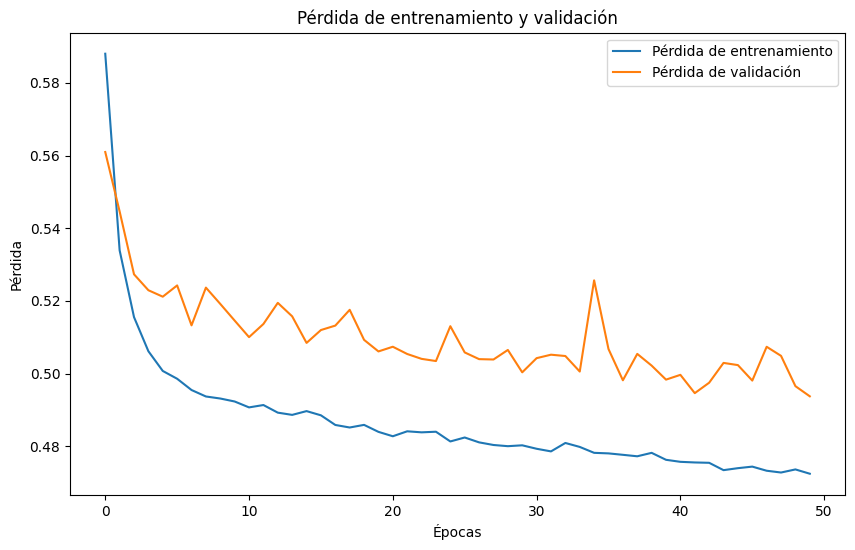

In [19]:
# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

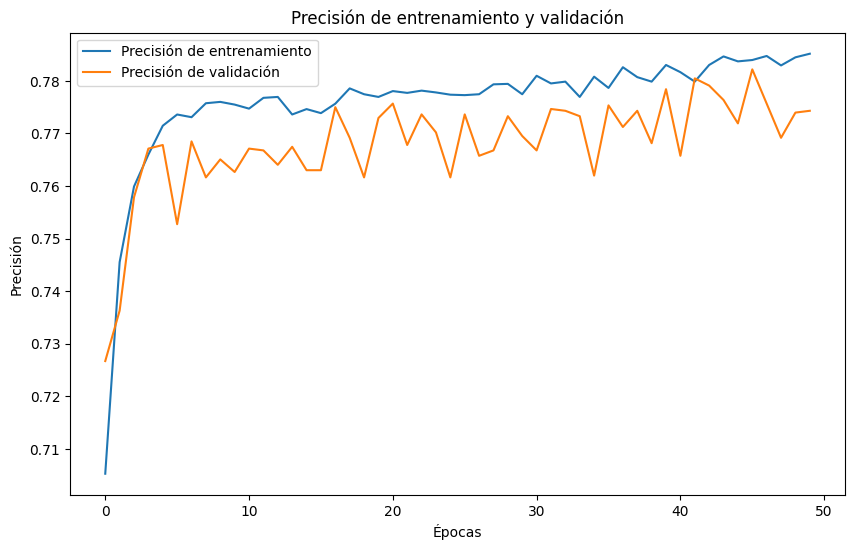

In [20]:
# Graficar la precisión de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

**Evaluación del modelo**

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Exactitud en el conjunto de prueba: {accuracy}')

115/115 [==============================] - 1s 8ms/step - loss: 0.4890 - accuracy: 0.7721
Pérdida en el conjunto de prueba: 0.48898032307624817
Exactitud en el conjunto de prueba: 0.7720547914505005


**Predicción de una muestra**

In [22]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

115/115 [==============================] - 0s 1ms/step


**Métricas**

In [23]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Matriz de confusión:')
print(conf_matrix)
print('Reporte de clasificación:')
print(class_report)

Precisión: 0.7667881311816762
Recall: 0.7932148626817448
F1-score: 0.7797776601376389
Matriz de confusión:
[[1345  448]
 [ 384 1473]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1793
           1       0.77      0.79      0.78      1857

    accuracy                           0.77      3650
   macro avg       0.77      0.77      0.77      3650
weighted avg       0.77      0.77      0.77      3650



**Gráfica de la pérdida de entrenamiento y validación**

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()